Analysis of NYC Public Schools
Data File: https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv

In [ ]:
#Import Data , Pandas Library, and Seaborn
import pandas as pd
import seaborn as sns
%matplotlib inline
SchoolData = pd.read_csv("https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv")
#Call dataframe to view data for cleaning and analysis
SchoolData


In [ ]:
#Data Cleansing:
# Review rows where where Number Scoring CR = na and Mean Score = s.
#After viewing the raw data set it appears that if those columns contain those vlaues then there are missing values in other columns that would prevent any mathematical equations from working.
SchoolData[(SchoolData['Number Scoring CR'] =='na' ) & (SchoolData['Mean Score']=='s')]

#Create new dataframe removing the filtered rows
SchoolData_1 = SchoolData[(SchoolData['Number Scoring CR'] !='na' ) & (SchoolData['Mean Score']!='s')]
SchoolData_1

#Review Datatypes and determine if any need to be converted
SchoolData_1.dtypes

#Convert Columns from object to INT for "Number" columns and FLOAT for "Percent" and "Mean" column
#define a dictionary for the column name and datatypes
convert_dict = {'Mean Score': float,
                'Number Scoring Below 65':  int, 'Percent Scoring Below 65': float,
                'Number Scoring 65 or Above': int,'Percent Scoring 65 or Above': float,
                'Number Scoring 80 or Above': int, 'Percent Scoring 80 or Above': float,
                'Number Scoring CR': int, 'Percent Scoring CR': float}
SchoolData_1 = SchoolData_1.astype(convert_dict)

#confirm datatype change
SchoolData_1.dtypes




In [43]:
# selected a random school  using SchoolData_1.sample()
# The school I will be using is 26Q415 Benjamin N. Cardozo High School
#Compare Total Tested and number scoring below 65  between 26Q415 and the rest of bourough Q high schools over the years

#create a Year/School Name column for Pivot index - and limit dataset to columns needed -
#after reviewing inital pivots there are many exams missing data - revising analysis to look at Common Core Algebra as it has the most complete data
SchoolData_2=SchoolData_1[['School Name', 'Regents Exam','Year', 'Total Tested','Number Scoring Below 65', 'Percent Scoring Below 65']]
SchoolData_2

#filter for 26Q415 and then the rest of the high schools
Bnchs=SchoolData_2[(SchoolData_1['School DBN']=='26Q415') & (SchoolData_1['Regents Exam'] == 'Common Core Algebra')]
Hsch26=SchoolData_2[(SchoolData_1['School DBN'].str.contains ('Q')) & (SchoolData_1['School Level'] == 'High school')& (SchoolData_1['School DBN'] != '26Q415') & (SchoolData_1['Regents Exam'] == 'Common Core Algebra')]

#Add Column "All Other Schools" as School  in order to aggregate data from the rest of the district
Hsch26.insert(0,'School', 'All Other Schools')

#Rename School Name Column for Bnchs so it will align
Bnchs.rename(columns={'School Name': 'School'}, inplace=True)

#Union tables back together

SchoolData_3 = pd.concat([Bnchs, Hsch26])
SchoolData_3


#create pivot for comparison

SchoolPivot = SchoolData_3.pivot_table(index=["Year"] ,columns=["School"], values=["Percent Scoring Below 65", "Total Tested","Number Scoring Below 65"])

SchoolPivot

<ipython-input-43-c9cee8429abf>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bnchs.rename(columns={'School Name': 'School'}, inplace=True)


Number Scoring Below 65                                  \
School       All Other Schools Benjamin N. Cardozo High School   
Year                                                             
2015                 54.688474                       73.461538   
2016                 52.172611                       71.153846   
2017                 49.838398                       53.076923   

       Percent Scoring Below 65                                  \
School        All Other Schools Benjamin N. Cardozo High School   
Year                                                              
2015                  52.161059                       45.676923   
2016                  36.489016                       24.169231   
2017                  33.896409                       19.838462   

            Total Tested                                  
School All Other Schools Benjamin N. Cardozo High School  
Year                                                      
2015          106.654206                      176.153846  
2016          150.616262                      321.923077  
2017          154.067680                      293.076923

<Axes: xlabel='Year', ylabel='Percent Scoring Below 65'>

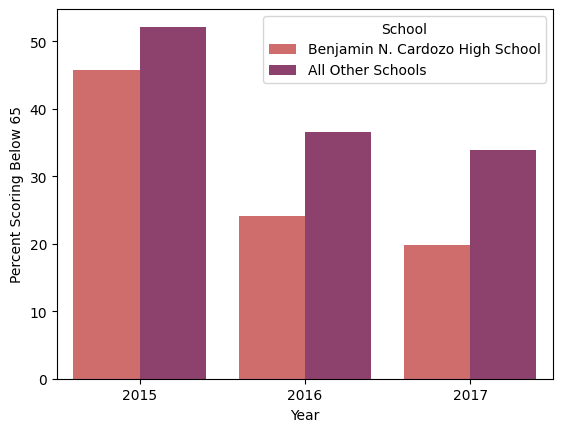

In [42]:
#Set color palette to flare
sns.color_palette("flare")

#Create a bar chart of  percent below 65 by year
sns.barplot(data=SchoolData_3, palette="flare", x='Year', y='Percent Scoring Below 65', hue='School', errorbar=None)

For my analysis I wanted to compare the Benjamin N Cardozo High School against the rest of the high schools in the same borough for the percentage of students that scored below 65 on a regent exam.

After reviewing the data the Common Core Algebra exam had the most consistent data to facilitate an analysis.

While the rest of the schools in the district had less students testing overall, a higher percentage of those students scored lower than a 65 on the Common Core Algebra Regent exam. This does not necessarily indicate that Cardozo High School had better performers overall - as having a larger population can have more test takers on both ends of the scale offsetting each other and lowering the percentages.

Next steps would be to review the other scoring categories to see if the same trend continues and comparing Cardozo High School agains other schools and regions with similar test taking populations.
